In [13]:
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../scripts")

Creating a DataFrame with significant events impacting Brent oil prices

In [14]:
from key_events import *

output_path = '../data/key_events_1987_2022.csv'

create_events_data(output_path)

Events saved to '../data/key_events_1987_2022.csv'


,Date,Event_Type,Event_Description
0,1987-07-01,OPEC Policy,OPEC stabilizes prices post-1986 glut with quo...
1,1988-07-18,Conflict Resolution,Iran-Iraq War ends; oil supply stabilizes
2,1989-02-15,Sanctions,U.S. sanctions on Libya tightened
3,1989-12-20,Political Decision,U.S. Strategic Petroleum Reserve release annou...
4,1990-08-02,Conflict,"Iraq invades Kuwait; Gulf War begins, oil supp..."
...,...,...,...
95,2021-07-18,OPEC Policy,OPEC+ agrees to gradual production increase
96,2021-10-04,OPEC Policy,OPEC+ boosts output as prices rise
97,2022-02-24,Conflict,Russia invades Ukraine; oil prices surge due t...
98,2022-06-02,OPEC Policy,OPEC+ increases production amid high prices


In [15]:
# Merge price data and event data
df1 = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=["Date"])
df1.sort_values("Date")
df2 = pd.read_csv('../data/key_events_1987_2022.csv')

# Change the date format to match
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

merged_df = pd.merge_asof(df1, df2, on="Date", direction="backward")
merged_df.to_csv('../data/merged_data.csv', index=False)

In [16]:
merged_df

,Date,Price,Event_Type,Event_Description
0,1987-05-20,18.63,NaN,NaN
1,1987-05-21,18.45,NaN,NaN
2,1987-05-22,18.55,NaN,NaN
3,1987-05-25,18.60,NaN,NaN
4,1987-05-26,18.63,NaN,NaN
...,...,...,...,...
9006,2022-11-08,96.85,War,"Russia-Ukraine war, energy crisis"
9007,2022-11-09,93.05,War,"Russia-Ukraine war, energy crisis"
9008,2022-11-10,94.25,War,"Russia-Ukraine war, energy crisis"
9009,2022-11-11,96.37,War,"Russia-Ukraine war, energy crisis"


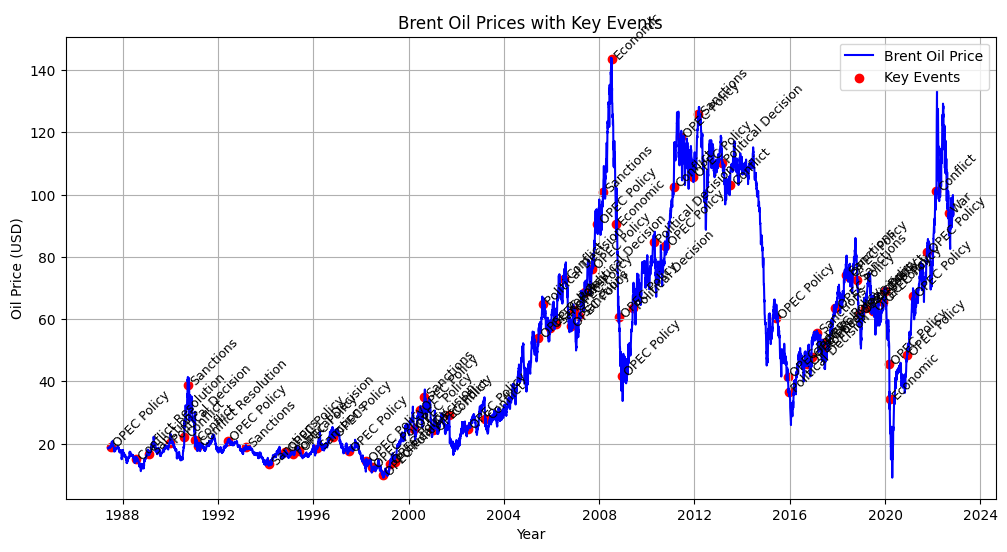

In [17]:
import matplotlib.pyplot as plt
# --- Visualization ---
# merge data suitable for visualization
df_event = pd.merge(df1, df2, on="Date", how="inner")

plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], df1["Price"], label="Brent Oil Price", color="blue")
plt.scatter(df_event["Date"], df_event["Price"], color="red", label="Key Events", marker="o")

# Annotate events
for i, row in df_event.iterrows():
  plt.text(row["Date"], row["Price"], row["Event_Type"], fontsize=9, rotation=45)

plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Year")
plt.ylabel("Oil Price (USD)")
plt.legend()
plt.grid()
plt.show()